# Displacement-controlled loading of a poroelastic material

This notebook will cover:

* Displacement-controlled experiments
* Working with neo-Hookean poroelastic materials
* Visualising outputs

In [1]:
import ucompress as uc
import matplotlib.pyplot as plt

## Example 1 - Time-dependent simulations

To start, the parameter values and the model must be defined.  These are taken to be from the pre-defined`NeoHookean` parameter set 

In [2]:
pars = uc.parameters.example_parameters.NeoHookean()

print(pars)

Dimensional parameter values
---------------------------------------
R = 5.00e-03
E_m = 5.00e+04
nu_m = 0.00e+00
k_0 = 2.00e-13
phi_0 = 8.00e-01
lam_z = 5.00e-01
beta_r = 1.00e+00
beta_z = 1.00e+00
F = -1.00e+00
t_start = 1.00e-01
t_end = 1.00e+04

Computational parameter values
-----------------------------------------
N = 40
Nt = 200
t_spacing = log



The axial strech is fixed at $\lambda_z = 0.5$, corresponding to an imposed axial strain of $\epsilon_z = 1 - \lambda_z = 0.5$.  The value of the applied force $F = -1$ N does not matter for this simulation.  The other parameters are explained in Notebook 01.

Now we define the model, which requires choosing the mechanics (stress-strain relation) and the permeability of the material.  In this case, we choose a neo-Hookean law and use a permeability that is constant in the deformed (Eulerian) state.  We build the model using the `Poroelastic` class

In [3]:
# Define the mechanics (stress-strain law)
mech = uc.mechanics.NeoHookean()

# Define the permeability
perm = uc.permeability.Constant()

# Build the model
model = uc.base_models.Poroelastic(
    mechanics = mech,
    permeability = perm,
    parameters = pars)

The problem for a displacement-controlled experiment is set up using the `DisplacementControlled` class from the experiments module:

In [4]:
problem = uc.experiments.DisplacementControlled(model, pars)

### Computing the initial response

First, the initial (also called instantaneous) response of the sample is calculated using the `initial_response` method.  This returns an object from the `Solution` class.  The force on the platten is then printed to the screen:

In [5]:
# compute the initial response
sol_instant = problem.initial_response()

# print the force to the screen
print(f'Initial force is {sol_instant.F:.2f} N')

Initial force is -6.87 N


### Computing the equilibrium response

It can also be useful to calculate the equilibrium response of a material.  This is possible using the `steady_response` method.

In [6]:
# compute the steady (equilibrium) response
sol_steady = problem.steady_response()

# print the force to the screen
print(f'Equilibrium force is {sol_steady.F:.2f} N')

Equilibrium force is -2.95 N


### Calculating the time-dependent response

The time-dependent response to compression can be calculated by calling the `transient_response` method.

In [7]:
sol = problem.transient_response()

--------------------------------
Transient step
Solver converged
Average number of Newton iterations per time step: 1.1


Having simulated the experiment, the force on the platten is plotted as a function of time.  We also plot the instantaneous and equilibrium forces too.

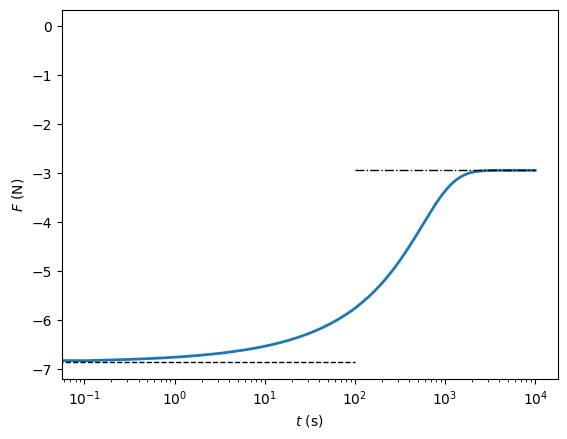

In [8]:
plt.semilogx(sol.t, sol.F, lw = 2)
plt.hlines(sol_instant.F, 1e-2, 1e2, lw = 1, color = 'k', linestyles='--')
plt.hlines(sol_steady.F, 1e2, 1e4, lw = 1, color = 'k', linestyles='-.')
plt.xlabel('$t$ (s)')
plt.ylabel('$F$ (N)')
plt.show()

## Example 2 - Visualising outputs and the Solution object

`Solution` objects contain information about the solution.  Variables are defined as attributes.  Printing a solution object provides information about the variables/attributes that it contains

In [12]:
print(sol_instant)

Solution object with attributes
t (time): []
r (radial coordinate): [0.000e+00 8.107e-06 3.237e-05 ... 4.968e-03 4.992e-03 5.000e-03]
u (radial displacement): [0.000e+00 3.358e-06 1.341e-05 ... 2.058e-03 2.068e-03 2.071e-03]
p (fluid pressure): [25000.]
lam_z (axial stretch): 0.5
F (force on platten): -6.872233929727671
J (Jacobian determinant): [[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
phi (porosity): [[0.8]
 [0.8]
 [0.8]
 ...
 [0.8]
 [0.8]
 [0.8]]
fluid_load_fraction: 0.5714285714285713



The instantaneous radial displacement can be plotted as follows:

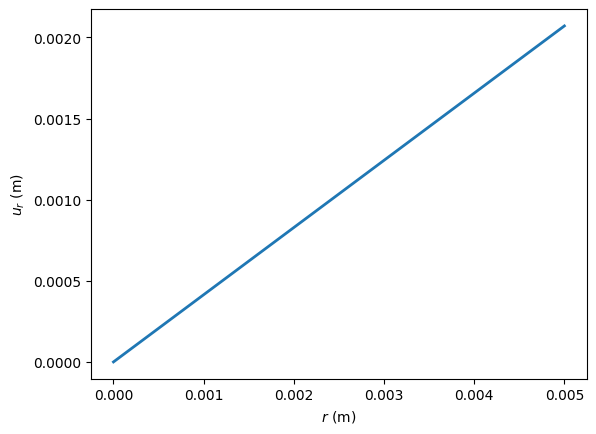

In [15]:
plt.plot(sol_instant.r, sol_instant.u, lw = 2)
plt.xlabel('$r$ (m)')
plt.ylabel('$u_r$ (m)')
plt.show()

For time-dependent simulations, spatio-temporal variables are stored as 2D NumPy arrays such that rows correspond to spatial grid points and columns correspond to time points:

In [16]:
print(sol)

Solution object with attributes
t (time): [0.000e+00 1.000e-01 1.060e-01 ... 8.907e+03 9.438e+03 1.000e+04]
r (radial coordinate): [0.000e+00 8.107e-06 3.237e-05 ... 4.968e-03 4.992e-03 5.000e-03]
u (radial displacement): [[ 0.000e+00  9.957e-25 -6.196e-22 ... -1.523e-19 -1.523e-19 -1.523e-19]
 [ 0.000e+00  3.358e-06  3.358e-06 ...  3.248e-09  3.248e-09  3.248e-09]
 [ 0.000e+00  1.341e-05  1.341e-05 ...  1.297e-08  1.297e-08  1.297e-08]
 ...
 [ 0.000e+00  2.053e-03  2.052e-03 ...  1.266e-06  1.266e-06  1.266e-06]
 [ 0.000e+00  2.057e-03  2.056e-03 ...  1.266e-06  1.266e-06  1.266e-06]
 [ 0.000e+00  2.057e-03  2.056e-03 ...  1.266e-06  1.266e-06  1.266e-06]]
p (fluid pressure): [[    0.    25181.463 25189.456 ...    -0.       -0.       -0.   ]
 [    0.    25181.448 25189.295 ...    -0.       -0.       -0.   ]
 [    0.    25181.466 25189.37  ...    -0.       -0.       -0.   ]
 ...
 [    0.    15839.378 15216.678 ...    -0.       -0.       -0.   ]
 [    0.     5218.402  4581.313 ...    -0

The fluid pressure can then be plotted at different times as follows:

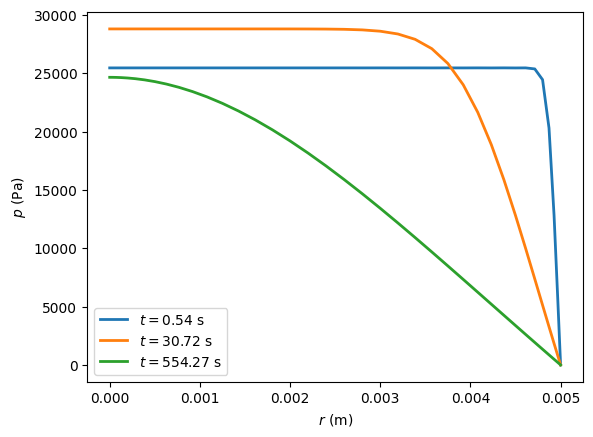

In [10]:
time_index = [30, 100, 150]
for n in time_index:
    label = f'$t = {sol.t[n]:.2f}$ s'
    plt.plot(sol.r, sol.p[:, n], lw = 2, label = label)

plt.legend()
plt.xlabel('$r$ (m)')
plt.ylabel('$p$ (Pa)')
plt.show()